In [1]:
using PyPlot
using LsqFit

In [2]:
push!(LOAD_PATH, "../../lib/");

In [3]:
using NaCsCalc.Format: Unc

In [4]:
data = readcsv("data/Na_tweezer_long_F.csv", header=true)[1]

11×4 Array{Float64,2}:
 10.0   86.0  142.0  -41.0
  9.0   78.0  119.0  -41.0
  8.0   78.0   92.0  -41.0
  7.0   83.0   86.0  -39.0
  6.0   92.0   78.0  -36.0
  5.0   98.0   77.0  -40.0
  4.0  118.0   77.0  -41.0
  3.0  138.0   92.0  -40.0
  2.0  168.0  117.0  -38.0
  1.0  201.0  150.0  -36.0
  0.0  230.0  180.0  -37.0

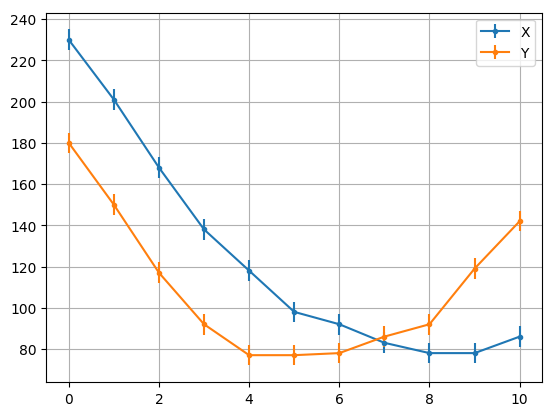

In [5]:
npts = size(data, 1)
errorbar(data[:, 1], data[:, 2], linspace(5, 5, npts), fmt=".-", label="X")
errorbar(data[:, 1], data[:, 3], linspace(5, 5, npts), fmt=".-", label="Y")
legend()
grid()

In [6]:
model(x, p) = sqrt.(p[1]^2 .+ (p[2] .* (x .- p[3])).^2)

model (generic function with 1 method)

In [7]:
fitx = curve_fit(model, data[:, 1], data[:, 2], [78.0, 30.0, 8.5])
fity = curve_fit(model, data[:, 1], data[:, 3], [78.0, 30.0, 5.0])
errx = estimate_errors(fitx)
erry = estimate_errors(fity)
@show Unc.(fitx.param, errx);
@show Unc.(fity.param, erry);

Unc.(fitx.param, errx) = NaCsCalc.Format.Unc{Float64}[72.4(69), 26.7(22), 7.82(42)]
Unc.(fity.param, erry) = NaCsCalc.Format.Unc{Float64}[70.3(66), 28.2(18), 5.56(19)]


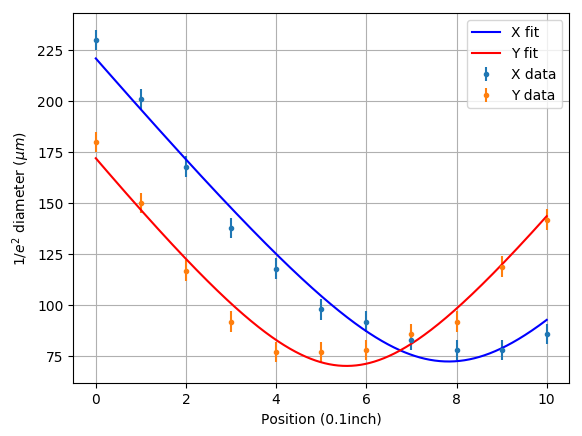

In [8]:
plotx = linspace(data[1, 1], data[end, 1], 1000)
errorbar(data[:, 1], data[:, 2], linspace(5, 5, npts), fmt=".", color="C0", label="X data")
errorbar(data[:, 1], data[:, 3], linspace(5, 5, npts), fmt=".", color="C1", label="Y data")
plot(plotx, model.(plotx, (fitx.param,)), color="b", label="X fit")
plot(plotx, model.(plotx, (fity.param,)), color="r", label="Y fit")
xlabel("Position (0.1inch)")
ylabel("\$1/e^2\$ diameter (\$\\mu m\$)")
legend()
grid()

In [9]:
errδ = sqrt(errx[3]^2 + erry[3]^2)
δ = fitx.param[3] - fity.param[3]
Unc(δ, errδ)

2.26(47)